# My Bedtimes

Here is the notebook where I document the times I went to bed on and create graphs


## Imports & Utils

In [2]:
from datetime import datetime, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def strfdelta(tdelta):
    if pd.isnull(tdelta):
        return tdelta

    h, rem = divmod(tdelta.seconds, 3600)
    m, s = divmod(rem, 60)

    return time(hour=int(h), minute=int(m), second=int(s)).strftime('%H:%M:%S')

## Injest data

In [3]:
bed_data = pd.read_excel('my-bedtimes.xlsx')
bed_data['bed'] = pd.to_datetime(bed_data['bed'])
bed_data["wake"] = pd.to_datetime(bed_data["wake"])
bed_data

,bed,wake
0,2024-11-06 04:00:00,2024-11-06 13:00:00
1,2024-11-07 04:09:00,2024-11-07 07:00:00
2,2024-11-07 21:49:00,2024-11-08 07:00:00
3,2024-11-09 07:07:00,2024-11-09 16:02:00
4,2024-11-10 07:10:00,2024-11-10 13:30:00
5,NaT,NaT
6,2024-11-12 05:13:00,2024-11-12 07:00:00
7,2024-11-13 04:02:00,2024-11-13 15:52:00
8,NaT,NaT
9,2024-11-15 05:05:00,2024-11-15 07:07:00


## Add sleep duration column

In [4]:
for index, row in bed_data.iterrows():
    sleep_duration = (row['wake'] - row['bed'])
    bed_data.at[index, 'sleep_duration'] = strfdelta(sleep_duration)
    
bed_data

,bed,wake,sleep_duration
0,2024-11-06 04:00:00,2024-11-06 13:00:00,09:00:00
1,2024-11-07 04:09:00,2024-11-07 07:00:00,02:51:00
2,2024-11-07 21:49:00,2024-11-08 07:00:00,09:11:00
3,2024-11-09 07:07:00,2024-11-09 16:02:00,08:55:00
4,2024-11-10 07:10:00,2024-11-10 13:30:00,06:20:00
5,NaT,NaT,NaT
6,2024-11-12 05:13:00,2024-11-12 07:00:00,01:47:00
7,2024-11-13 04:02:00,2024-11-13 15:52:00,11:50:00
8,NaT,NaT,NaT
9,2024-11-15 05:05:00,2024-11-15 07:07:00,02:02:00


## Plot data

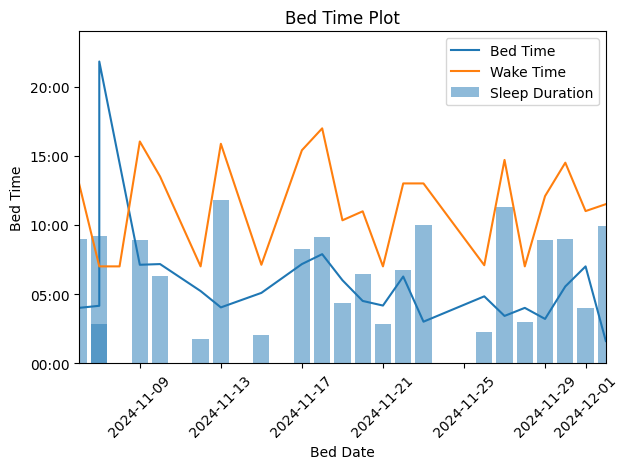

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np

bed_data["bed_date"] = pd.to_datetime(bed_data["bed"].dt.date)
bed_data["wake_date"] = pd.to_datetime(bed_data["wake"].dt.date)
bed_data["bed_time"] = bed_data["bed"].apply(lambda x: x.hour + x.minute / 60)
bed_data["wake_time"] = bed_data["wake"].apply(lambda x: x.hour + x.minute / 60)

bed_data.dropna(inplace=True)


# Function to convert decimal hours to HH:MM
def hours_to_hhmm(x, pos):
    hours = int(x)
    minutes = int((x - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

def hhmmss_to_hours(x):
    h, m, s = x.split(":")
    return int(h) + int(m) / 60 + int(s) / 3600


# Plot
fig, ax = plt.subplots()
ax.plot(bed_data["bed_date"], bed_data["bed_time"], label="Bed Time")
ax.plot(bed_data["wake_date"], bed_data["wake_time"], label="Wake Time")
ax.bar(
    bed_data["bed_date"],
    [hhmmss_to_hours(x) for x in bed_data["sleep_duration"]],
    alpha=0.5,
    label="Sleep Duration"
)

# Format the x-axis to show dates
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
ax.set_xlim(bed_data["bed_date"].min(), bed_data["wake_date"].max())

# Format the y-axis for times
ax.yaxis.set_major_formatter(FuncFormatter(hours_to_hhmm))
ax.set_ylim(0, 24)  # Ensure y-axis covers 24 hours

plt.xticks(rotation=45)
plt.xlabel("Bed Date")
plt.ylabel("Bed Time")
plt.title("Bed Time Plot")
plt.legend()
plt.tight_layout()
plt.show()